## Import dependencies
Execute ‘bash dep_install.bash‘ in terminal

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Load temperature data set (https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)

In [3]:
global_temperature_data = pd.read_csv("./data/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")

In [4]:
global_temperature_data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


## Induktive Statistik

4. a) 95% Konfidenzintervall (Was sind die Grenzen für die Temperatur) ... '95% der Temperaturen liefen in folgendem Intervall'

Number of empty values: 12
Number of non-empty values: 3180


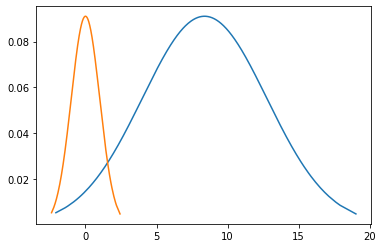

In [5]:
# remove nan values
print('Number of empty values: ' + str((np.isnan(global_temperature_data["LandAverageTemperature"])).sum(0)))
print('Number of non-empty values: ' + str((~np.isnan(global_temperature_data["LandAverageTemperature"])).sum(0)))
clean_data = [x for x in global_temperature_data["LandAverageTemperature"] if ~np.isnan(x)]

# sort data
sorted_data = sorted(clean_data)

# Mean and standard deviation
mean = np.mean(sorted_data, dtype=np.float64)
sd = np.std(sorted_data, dtype=np.float64)

# Probability density function
pdf = stats.norm.pdf(sorted_data, mean, sd)

# Plot distribution
plt.plot(sorted_data, pdf)

# Standardization
standardized_data = (sorted_data - mean) / sd
plt.plot(standardized_data, pdf)

In [41]:
# 95% Konfidenzintervall
# https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers
alpha = 0.05                             # significance level = 5%
df = len(sorted_data) - 1                # degress of freedom
t = stats.t.ppf(1 - alpha/2, df)         # t-critical value for 95% CI
n = len(sorted_data)

lower = mean - (t * sd / np.sqrt(n))
upper = mean + (t * sd / np.sqrt(n))

print(lower)
print(upper)

8.374731132075471
8.22241862113991
8.527043643011032


b) Wie groß muss der Stichprobenumfang mindestens sein, damit die Breite des 95% Konfidenzintervalls für die Temperatur höchstens 20 *C

Signifikanz Test (temperature overall 1750-01-01 - 2015-12-01)

In [40]:
# Null hypothesis — The mean overall temperature is 8.374731132075471
# Alternative hypothesis — The mean overall temperature is greater than 8.374731132075471

# What is the probability that we reach an average temperature of 8.5 (Mean= 8.374731132075471)
stats.ttest_1samp(sorted_data, 8.5)

# P-value of 10,9..% > significance level 5% = not statistically significant
# At what temperature do we receive statistically significant p-value?
stats.ttest_1samp(sorted_data, 8.53)

# Sources
# https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8
# https://www.youtube.com/watch?v=dPXBN8ms-cU

Ttest_1sampResult(statistic=-1.9984532188428852, pvalue=0.045752569458540976)

In [ ]:
Signifikanz Test (temperature modern age 1990 - 2015)